In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import math
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from numpy import trapz
plt.style.use('seaborn-darkgrid')

#### Import Kestrel data and change year to 2015

In [2]:
dtypes=[datetime, float]
kes15 = pd.read_excel('Kestrel_data2015.xlsx',names=['time','ws'],header=3)
kes15['time']=kes15['time'].apply((lambda x: x.replace(year=2015)))


start_date = pd.Timestamp(2015,3,11,12,30,0)
end_date = pd.Timestamp(2015,3,11,13,5,0)
mask1 = (kes15['time'] > start_date) & (kes15['time'] <= end_date)
kes15_1 = kes15.loc[mask1]


start_date = pd.Timestamp(2015,3,11,13,10,0)
end_date = pd.Timestamp(2015,3,11,13,30,0)
mask2=(kes15['time'] > start_date) & (kes15['time'] <= end_date)
kes15_2 = kes15.loc[mask2]


#### Import 2015 Pitot data 

In [3]:
pit15_1 = pd.read_csv('WindTunnelCalibration2015_test1.csv',header=0)
pit15_1.columns = ['time','fan_rpm','air_temp','air_dens','press','ws']
pit15_1['time']=pit15_1['time'].apply((lambda x: pd.to_datetime(x[-5:])))
pit15_1['time']=pit15_1['time'].apply((lambda x: x.replace(year=2015)))
pit15_1['time']=pit15_1['time'].apply((lambda x: x.replace(month=3)))
pit15_1['time']=pit15_1['time'].apply((lambda x: x.replace(day=11)))

In [4]:
pit15_2=pd.read_csv('WindTunnelCalibration2015_test2.csv',header=0)
pit15_2.columns = ['time','fan_rpm','air_temp','air_dens','press','ws']
pit15_2['time']=pit15_2['time'].apply((lambda x: pd.to_datetime(x[-5:])))
pit15_2['time']=pit15_2['time'].apply((lambda x: x.replace(year=2015)))
pit15_2['time']=pit15_2['time'].apply((lambda x: x.replace(month=3)))
pit15_2['time']=pit15_2['time'].apply((lambda x: x.replace(day=11)))
pit15_2.head()

,time,fan_rpm,air_temp,air_dens,press,ws
0,2015-03-11 13:10:00,100,17.1,1.2,20.0,2.6
1,2015-03-11 13:11:00,100,17.1,1.2,20.0,2.6
2,2015-03-11 13:14:00,150,17.2,1.2,45.0,3.8
3,2015-03-11 13:15:00,150,17.2,1.2,45.0,3.8
4,2015-03-11 13:17:00,280,17.1,1.2,NaN,NaN


#### Import 2015 Sonic data 

In [5]:
son15 = pd.read_csv('2015_sonic_1230_start.txt', sep=",", header=None)
son15.columns = ['gu','gv','gw','sound_speed','temp']
N=len(son15)
freq= 10   #Hz
dt= str(1/freq)+'S'   #seconds 
start_time=pd.Timestamp(2015,3,11,12,30,0.0)
time = pd.date_range(start = start_time,periods=N,freq=dt)
son15.insert(0,'time',time,True)
son15 = son15[son15.gu < 20]
son15 = son15[son15.gv < 20]

#### Convert Gill to Met

In [6]:
def convert_gill_to_met(gu,gv,gw):
    w = [x for x in gw]
    u = [-x for x in gv]
    v = [x for x in gu]
    
    return [u,v,w]


def mean_horizontal_wind(u,v):
    mean_winds=[]
    for i in range(len(u)):
        M = np.sqrt((u[i])**2 + (v[i])**2)
        mean_winds.append(M)
    return mean_winds

In [7]:
met_dirs15 = convert_gill_to_met(son15['gu'],son15['gv'],son15['gw'])
u15=met_dirs15[0]
v15=met_dirs15[1]
w15=met_dirs15[2]
M15 = mean_horizontal_wind(u15,v15)
son15.insert(1,'u',u15,True)
son15.insert(2,'v',v15,True)
son15.insert(3,'w',w15,True)
son15.insert(4,'mean_wind',M15,True)
son15.head()

,time,u,v,w,mean_wind,gu,gv,gw,sound_speed,temp
0,2015-03-11 12:30:00.000,2.10,-0.08,0.01,2.101523,-0.08,-2.10,0.01,343.95,20.56
1,2015-03-11 12:30:00.100,2.12,-0.09,0.01,2.121910,-0.09,-2.12,0.01,343.95,20.56
2,2015-03-11 12:30:00.200,2.12,-0.10,0.01,2.122357,-0.10,-2.12,0.01,343.96,20.57
3,2015-03-11 12:30:00.300,2.13,-0.12,0.01,2.133378,-0.12,-2.13,0.01,343.96,20.57
4,2015-03-11 12:30:00.400,2.14,-0.14,0.01,2.144575,-0.14,-2.14,0.01,343.97,20.59


In [8]:
start_date = pd.Timestamp(2015,3,11,12,30,0)
end_date = pd.Timestamp(2015,3,11,13,5,0)
mask1 = (son15['time'] > start_date) & (son15['time'] <= end_date)
son15_1 = son15.loc[mask1]


start_date = pd.Timestamp(2015,3,11,13,10,0)
end_date = pd.Timestamp(2015,3,11,13,30,0)
mask2=(son15['time'] > start_date) & (son15['time'] <= end_date)
son15_2 = son15.loc[mask2]
son15_2.sort_values('mean_wind',ascending=False)
son15_2 = son15_2.drop(25527)
son15_2 = son15_2.drop(34739)

#### Plot wind trace for test 1 2015

Text(0.5,1,'Wind Speed Traces Test 1 2015')

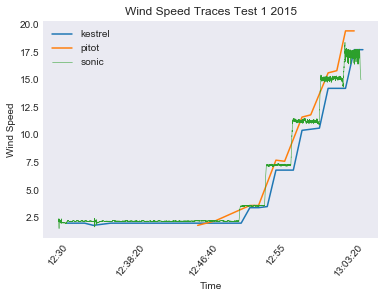

In [9]:
plt.plot(kes15_1['time'].dt.time,kes15_1['ws'])
plt.plot(pit15_1['time'].dt.time,pit15_1['ws'])
plt.plot(son15_1['time'].dt.time,son15_1['mean_wind'],linewidth =0.51)
plt.legend(['kestrel','pitot','sonic'])
plt.xticks(rotation=50)
plt.grid()
plt.ylabel('Wind Speed')
plt.xlabel('Time')
plt.title('Wind Speed Traces Test 1 2015')

Text(0.5,1,'Wind Speed Traces Test 2 2015')

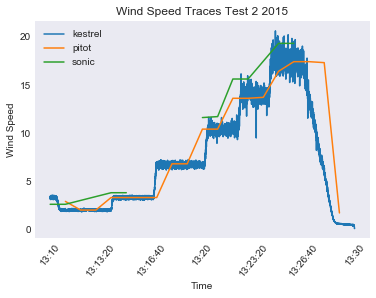

In [10]:
plt.plot(son15_2['time'].dt.time,son15_2['mean_wind'])
plt.plot(kes15_2['time'].dt.time,kes15_2['ws'])
plt.plot(pit15_2['time'].dt.time,pit15_2['ws'])
plt.legend(['kestrel','pitot','sonic'])
plt.xticks(rotation=50)
plt.grid()
plt.ylabel('Wind Speed')
plt.xlabel('Time')
plt.title('Wind Speed Traces Test 2 2015')

In [11]:
mask_times = son15.time.isin(pit15_2.time)
son15_times = son15.loc[mask_times]
all_indices = son15_times.index
all_indices

Int64Index([24000, 24600, 26400, 27000, 28200, 28800, 30000, 30600, 31200,
            31800, 33000, 33600],
           dtype='int64')

In [12]:
son15_times

,time,u,v,w,mean_wind,gu,gv,gw,sound_speed,temp
24000,2015-03-11 13:10:00,0.16,-3.20,0.00,3.203998,-3.20,-0.16,0.00,343.33,19.49
24600,2015-03-11 13:11:00,0.17,-2.08,0.06,2.086936,-2.08,-0.17,0.06,343.45,19.70
26400,2015-03-11 13:14:00,0.08,-1.98,-0.03,1.981616,-1.98,-0.08,-0.03,343.51,19.80
27000,2015-03-11 13:15:00,0.12,-3.24,0.02,3.242221,-3.24,-0.12,0.02,343.50,19.78
28200,2015-03-11 13:17:00,0.62,-6.61,0.20,6.639013,-6.61,-0.62,0.20,343.28,19.42
28800,2015-03-11 13:18:00,0.15,-6.73,-0.03,6.731671,-6.73,-0.15,-0.03,343.12,19.14
30000,2015-03-11 13:20:00,0.32,-6.76,-0.07,6.767570,-6.76,-0.32,-0.07,342.89,18.76
30600,2015-03-11 13:21:00,0.91,-10.85,0.19,10.888094,-10.85,-0.91,0.19,343.11,19.12
31200,2015-03-11 13:22:00,-0.17,-10.00,-0.12,10.001445,-10.00,0.17,-0.12,343.07,19.05
31800,2015-03-11 13:23:00,0.77,-15.02,-0.53,15.039724,-15.02,-0.77,-0.53,342.73,18.48


In [13]:
son15_avg_2 = pd.DataFrame(columns=['u','v','w','mean_wind','gu','gv','gw','sound_speed','temp'])
df0=pd.DataFrame(son15.iloc[all_indices[0]-10:all_indices[0]+10].mean())
df1=pd.DataFrame(son15.iloc[all_indices[1]-10:all_indices[1]+10].mean())
df2=pd.DataFrame(son15.iloc[all_indices[2]-10:all_indices[2]+10].mean())
df3=pd.DataFrame(son15.iloc[all_indices[3]-10:all_indices[3]+10].mean())
df4=pd.DataFrame(son15.iloc[all_indices[4]-10:all_indices[4]+10].mean())
df5=pd.DataFrame(son15.iloc[all_indices[5]-10:all_indices[5]+10].mean())
df6=pd.DataFrame(son15.iloc[all_indices[6]-10:all_indices[6]+10].mean())
df7=pd.DataFrame(son15.iloc[all_indices[7]-10:all_indices[7]+10].mean())
df8=pd.DataFrame(son15.iloc[all_indices[8]-10:all_indices[8]+10].mean())
df9=pd.DataFrame(son15.iloc[all_indices[9]-10:all_indices[9]+10].mean())
df10=pd.DataFrame(son15.iloc[all_indices[10]-10:all_indices[10]+10].mean())
df11=pd.DataFrame(son15.iloc[all_indices[11]-10:all_indices[11]+10].mean())

son15_avg_2=son15_avg_2.append(df0.T,ignore_index=True)
son15_avg_2=son15_avg_2.append(df1.T,ignore_index=True)
son15_avg_2=son15_avg_2.append(df2.T,ignore_index=True)
son15_avg_2=son15_avg_2.append(df3.T,ignore_index=True)
son15_avg_2=son15_avg_2.append(df4.T,ignore_index=True)
son15_avg_2=son15_avg_2.append(df5.T,ignore_index=True)
son15_avg_2=son15_avg_2.append(df6.T,ignore_index=True)
son15_avg_2=son15_avg_2.append(df7.T,ignore_index=True)
son15_avg_2=son15_avg_2.append(df8.T,ignore_index=True)
son15_avg_2=son15_avg_2.append(df9.T,ignore_index=True)
son15_avg_2=son15_avg_2.append(df10.T,ignore_index=True)
son15_avg_2=son15_avg_2.append(df11.T,ignore_index=True)

In [14]:
time=pit15_2['time']
son15_avg_2.insert(0,'time',time,True)
son15_avg_2

,time,u,v,w,mean_wind,gu,gv,gw,sound_speed,temp
0,2015-03-11 13:10:00,0.0650,-1.9760,0.0215,1.978171,-1.9760,-0.0650,0.0215,343.3875,19.5940
1,2015-03-11 13:11:00,0.0575,-1.9870,0.0160,1.989918,-1.9870,-0.0575,0.0160,343.3915,19.6015
2,2015-03-11 13:14:00,0.1285,-3.2680,0.0275,3.274362,-3.2680,-0.1285,0.0275,343.4375,19.6760
3,2015-03-11 13:15:00,0.1710,-3.2970,0.0330,3.304459,-3.2970,-0.1710,0.0330,343.4695,19.7315
4,2015-03-11 13:17:00,0.2265,-6.6820,0.0750,6.687755,-6.6820,-0.2265,0.0750,343.2245,19.3195
5,2015-03-11 13:18:00,0.2685,-6.7245,0.0880,6.732621,-6.7245,-0.2685,0.0880,343.0535,19.0275
6,2015-03-11 13:20:00,0.3825,-10.3345,0.1990,10.348166,-10.3345,-0.3825,0.1990,343.0230,18.9740
7,2015-03-11 13:21:00,0.3600,-10.3970,0.2325,10.412871,-10.3970,-0.3600,0.2325,343.0155,18.9630
8,2015-03-11 13:22:00,0.6030,-14.2320,0.3390,14.258851,-14.2320,-0.6030,0.3390,342.9230,18.8045
9,2015-03-11 13:23:00,0.2340,-13.8110,0.3815,13.827973,-13.8110,-0.2340,0.3815,343.0870,19.0855


Calibration Equation: Pitot Wind Speed = -3.2437 + 3.9527 * Sonic Wind Speed (Test 2)
Bias = 0     0.408495
1     0.396749
2     0.097077
3     0.066979
4          NaN
5          NaN
6    -0.575708
7    -0.558349
8    -1.203820
9    -0.772942
10   -1.439064
11    3.580584
Name: mean_wind, dtype: float64


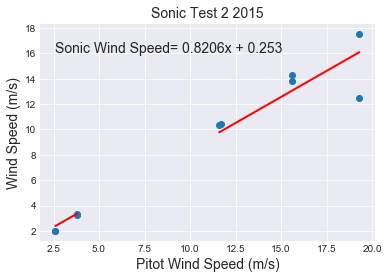

In [15]:
# plt.style.use('seaborn-darkgrid')
x=pit15_2['ws']
y=son15_avg_2['mean_wind']

mask = ~np.isnan(x) & ~np.isnan(y)
stats = linregress(x[mask],y[mask])
m = stats.slope
b = stats.intercept 

# Change the default marker for the scatter from circles to x's
# plt.scatter(x, y, marker='o',color='#003F72')
plt.scatter(x, y, marker='o')
# Set the linewidth on the regression line to 3px
y2= [i*m+b for i in x]
cor = np.corrcoef(x, y)
 
plt.plot(x, y2, color="red", linewidth=2)
plt.xlabel('Pitot Wind Speed (m/s)',fontsize='14')
plt.ylabel('Wind Speed (m/s)',fontsize='14')
plt.title('Sonic Test 2 2015',fontsize='14')        
s= 'Sonic Wind Speed= ' + str(round(m,4))+'x + '+str(round(b,4))
plt.grid(True)
plt.text(min(x),max(y2),s,fontsize='14')

c1 = 1/b
c0= (-1*m)/b

cal_eqn = 'Calibration Equation: Pitot Wind Speed = ' + str(round(c0,4))+ ' + '+str(round(c1,4))+' * Sonic Wind Speed (Test 2)'
print(cal_eqn)

bias = y2 - y
print('Bias = ' + str(bias))

In [16]:
mask_times = son15.time.isin(pit15_1.time)
son15_times = son15.loc[mask_times]
all_indices = son15_times.index
all_indices

Int64Index([9600, 10800, 13200, 13800, 15000, 15600, 16800, 17400, 18600,
            19200, 19800],
           dtype='int64')

In [17]:
son15_times
len(son15_times)

11

In [18]:
son15_avg_1 = pd.DataFrame(columns=['u','v','w','mean_wind','gu','gv','gw','sound_speed','temp'])
df0=pd.DataFrame(son15.iloc[all_indices[0]-10:all_indices[0]+10].mean())
df1=pd.DataFrame(son15.iloc[all_indices[1]-10:all_indices[1]+10].mean())
df2=pd.DataFrame(son15.iloc[all_indices[2]-10:all_indices[2]+10].mean())
df3=pd.DataFrame(son15.iloc[all_indices[3]-10:all_indices[3]+10].mean())
df4=pd.DataFrame(son15.iloc[all_indices[4]-10:all_indices[4]+10].mean())
df5=pd.DataFrame(son15.iloc[all_indices[5]-10:all_indices[5]+10].mean())
df6=pd.DataFrame(son15.iloc[all_indices[6]-10:all_indices[6]+10].mean())
df7=pd.DataFrame(son15.iloc[all_indices[7]-10:all_indices[7]+10].mean())
df8=pd.DataFrame(son15.iloc[all_indices[8]-10:all_indices[8]+10].mean())
df9=pd.DataFrame(son15.iloc[all_indices[9]-10:all_indices[9]+10].mean())
df10=pd.DataFrame(son15.iloc[all_indices[10]-10:all_indices[10]+10].mean())
# df11=pd.DataFrame(son15.iloc[all_indices[11]-10:all_indices[11]+10].mean())

son15_avg_1=son15_avg_1.append(df0.T,ignore_index=True)
son15_avg_1=son15_avg_1.append(df1.T,ignore_index=True)
son15_avg_1=son15_avg_1.append(df2.T,ignore_index=True)
son15_avg_1=son15_avg_1.append(df3.T,ignore_index=True)
son15_avg_1=son15_avg_1.append(df4.T,ignore_index=True)
son15_avg_1=son15_avg_1.append(df5.T,ignore_index=True)
son15_avg_1=son15_avg_1.append(df6.T,ignore_index=True)
son15_avg_1=son15_avg_1.append(df7.T,ignore_index=True)
son15_avg_1=son15_avg_1.append(df8.T,ignore_index=True)
son15_avg_1=son15_avg_1.append(df9.T,ignore_index=True)
son15_avg_1=son15_avg_1.append(df10.T,ignore_index=True)
# son15_avg_1=son15_avg_1.append(df11.T,ignore_index=True)

In [19]:
time=pit15_1['time']
son15_avg_1.insert(0,'time',time,True)
son15_avg_1

,time,u,v,w,mean_wind,gu,gv,gw,sound_speed,temp
0,2015-03-11 12:46:00,2.2085,0.0255,0.0180,2.208669,0.0255,-2.2085,0.0180,343.8440,20.3780
1,2015-03-11 12:48:00,2.2005,0.0210,0.0245,2.200621,0.0210,-2.2005,0.0245,343.7095,20.1450
2,2015-03-11 12:52:00,3.5765,0.0350,0.0245,3.576720,0.0350,-3.5765,0.0245,343.8520,20.3870
3,2015-03-11 12:53:00,3.5450,0.0410,0.0320,3.545275,0.0410,-3.5450,0.0320,343.7645,20.2365
4,2015-03-11 12:55:00,7.2655,0.1210,0.0450,7.266582,0.1210,-7.2655,0.0450,343.4450,19.6985
5,2015-03-11 12:56:00,7.2935,0.1180,0.0465,7.294502,0.1180,-7.2935,0.0465,343.5105,19.8115
6,2015-03-11 12:58:00,11.2535,0.2040,0.0950,11.255422,0.2040,-11.2535,0.0950,343.4240,19.6630
7,2015-03-11 12:59:00,11.2225,0.1840,0.0845,11.224060,0.1840,-11.2225,0.0845,343.3060,19.4625
8,2015-03-11 13:01:00,15.1225,0.2930,0.1715,15.125476,0.2930,-15.1225,0.1715,343.2710,19.3980
9,2015-03-11 13:02:00,15.1710,0.3235,0.1890,15.174596,0.3235,-15.1710,0.1890,343.2490,19.3575


In [20]:
pit15_1

,time,fan_rpm,air_temp,air_dens,press,ws
0,2015-03-11 12:46:00,100,17.2,1.2,10,1.8
1,2015-03-11 12:48:00,100,17.3,1.2,15,2.2
2,2015-03-11 12:52:00,150,17.5,1.2,40,3.6
3,2015-03-11 12:53:00,150,17.4,1.2,40,3.6
4,2015-03-11 12:55:00,280,17.3,1.2,180,7.7
5,2015-03-11 12:56:00,280,17.4,1.2,175,7.6
6,2015-03-11 12:58:00,420,17.2,1.2,410,11.6
7,2015-03-11 12:59:00,420,17.2,1.2,420,11.8
8,2015-03-11 13:01:00,560,17.3,1.2,740,15.6
9,2015-03-11 13:02:00,560,17.0,1.2,760,15.8


Calibration Equation: Pitot Wind Speed = -2.5388 + 2.7677 * Sonic Wind Speed (Test 1)
Bias = 0    -0.196258
1     0.178702
2     0.086792
3     0.118237
4     0.157770
5     0.038123
6    -0.253685
7    -0.038867
8    -0.454626
9    -0.320290
10    0.684102
Name: mean_wind, dtype: float64


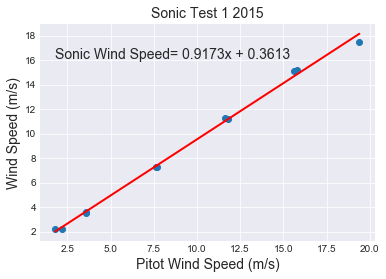

In [21]:
# plt.style.use('seaborn-darkgrid')
x=pit15_1.iloc[:11]['ws']
y=son15_avg_1['mean_wind']

mask = ~np.isnan(x) & ~np.isnan(y)
stats = linregress(x[mask],y[mask])
m = stats.slope
b = stats.intercept 

# Change the default marker for the scatter from circles to x's
# plt.scatter(x, y, marker='o',color='#003F72')
plt.scatter(x, y, marker='o')
# Set the linewidth on the regression line to 3px
y2= [i*m+b for i in x]
cor = np.corrcoef(x, y)
 
plt.plot(x, y2, color="red", linewidth=2)
plt.xlabel('Pitot Wind Speed (m/s)',fontsize='14')
plt.ylabel('Wind Speed (m/s)',fontsize='14')
plt.title('Sonic Test 1 2015',fontsize='14')        
s= 'Sonic Wind Speed= ' + str(round(m,4))+'x + '+str(round(b,4))
plt.grid(True)
plt.text(min(x),max(y2)-2,s,fontsize='14')


c1 = 1/b
c0= (-1*m)/b

cal_eqn ='Calibration Equation: Pitot Wind Speed = ' + str(round(c0,4))+ ' + '+str(round(c1,4))+' * Sonic Wind Speed (Test 1)'
print(cal_eqn)

bias = y2 - y
print('Bias = ' + str(bias))

In [22]:
mask_times = kes15.time.isin(pit15_1.time)
kes15_times = kes15.loc[mask_times]
all_indices = kes15_times.index
all_indices

Int64Index([31, 33, 37, 38, 40, 41, 43, 44, 46, 47, 48, 49], dtype='int64')

In [23]:
kes15_times
len(kes15_times)


12

In [24]:
kes15_avg_1 = pd.DataFrame(columns=['ws'])
df0=pd.DataFrame(kes15.iloc[all_indices[0]-10:all_indices[0]+10].mean())
df1=pd.DataFrame(kes15.iloc[all_indices[1]-10:all_indices[1]+10].mean())
df2=pd.DataFrame(kes15.iloc[all_indices[2]-10:all_indices[2]+10].mean())
df3=pd.DataFrame(kes15.iloc[all_indices[3]-10:all_indices[3]+10].mean())
df4=pd.DataFrame(kes15.iloc[all_indices[4]-10:all_indices[4]+10].mean())
df5=pd.DataFrame(kes15.iloc[all_indices[5]-10:all_indices[5]+10].mean())
df6=pd.DataFrame(kes15.iloc[all_indices[6]-10:all_indices[6]+10].mean())
df7=pd.DataFrame(kes15.iloc[all_indices[7]-10:all_indices[7]+10].mean())
df8=pd.DataFrame(kes15.iloc[all_indices[8]-10:all_indices[8]+10].mean())
df9=pd.DataFrame(kes15.iloc[all_indices[9]-10:all_indices[9]+10].mean())
df10=pd.DataFrame(kes15.iloc[all_indices[10]-10:all_indices[10]+10].mean())
df11=pd.DataFrame(kes15.iloc[all_indices[11]-10:all_indices[11]+10].mean())

kes15_avg_1=kes15_avg_1.append(df0.T,ignore_index=True)
kes15_avg_1=kes15_avg_1.append(df1.T,ignore_index=True)
kes15_avg_1=kes15_avg_1.append(df2.T,ignore_index=True)
kes15_avg_1=kes15_avg_1.append(df3.T,ignore_index=True)
kes15_avg_1=kes15_avg_1.append(df4.T,ignore_index=True)
kes15_avg_1=kes15_avg_1.append(df5.T,ignore_index=True)
kes15_avg_1=kes15_avg_1.append(df6.T,ignore_index=True)
kes15_avg_1=kes15_avg_1.append(df7.T,ignore_index=True)
kes15_avg_1=kes15_avg_1.append(df8.T,ignore_index=True)
kes15_avg_1=kes15_avg_1.append(df9.T,ignore_index=True)
kes15_avg_1=kes15_avg_1.append(df10.T,ignore_index=True)
kes15_avg_1=kes15_avg_1.append(df11.T,ignore_index=True)

In [25]:
time=pit15_1['time']
kes15_avg_1.insert(0,'time',time,True)
kes15_avg_1

,time,ws
0,2015-03-11 12:46:00,2.455
1,2015-03-11 12:48:00,2.935
2,2015-03-11 12:52:00,4.820
3,2015-03-11 12:53:00,5.430
4,2015-03-11 12:55:00,6.825
5,2015-03-11 12:56:00,7.610
6,2015-03-11 12:58:00,7.795
7,2015-03-11 12:59:00,7.870
8,2015-03-11 13:01:00,7.985
9,2015-03-11 13:02:00,8.030


Calibration Equation: Pitot Wind Speed = -0.069 + 0.2614 * Kestrel Wind Speed (Test 1)
Bias = 0     1.845372
1     1.470958
2    -0.044491
3    -0.654491
4    -0.967236
5    -1.778632
6    -0.907773
7    -0.929980
8    -0.041913
9    -0.034120
10    0.986153
11    1.056153
Name: ws, dtype: float64


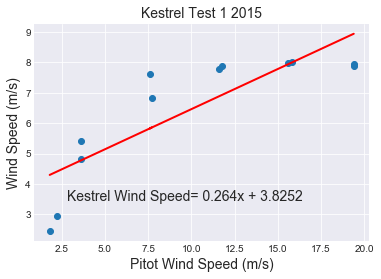

In [26]:
# plt.style.use('seaborn-darkgrid')
x=pit15_1['ws']
y=kes15_avg_1['ws']

mask = ~np.isnan(x) & ~np.isnan(y)
stats = linregress(x[mask],y[mask])
m = stats.slope
b = stats.intercept 

# Change the default marker for the scatter from circles to x's
# plt.scatter(x, y, marker='o',color='#003F72')
plt.scatter(x, y, marker='o')
# Set the linewidth on the regression line to 3px
y2= [i*m+b for i in x]
cor = np.corrcoef(x, y)
 
plt.plot(x, y2, color="red", linewidth=2)
plt.xlabel('Pitot Wind Speed (m/s)',fontsize='14')
plt.ylabel('Wind Speed (m/s)',fontsize='14')
plt.title('Kestrel Test 1 2015',fontsize='14')        
s= 'Kestrel Wind Speed= ' + str(round(m,4))+'x + '+str(round(b,4))
plt.grid(True)
plt.text(min(x)+1,min(y)+1,s,fontsize='14')

c1 = 1/b
c0= (-1*m)/b

cal_eqn ='Calibration Equation: Pitot Wind Speed = ' + str(round(c0,4))+ ' + '+str(round(c1,4))+' * Kestrel Wind Speed (Test 1)'
print(cal_eqn)

bias = y2 - y
print('Bias = ' + str(bias))

In [27]:
mask_times = kes15.time.isin(pit15_2.time)
kes15_times = kes15.loc[mask_times]
all_indices = kes15_times.index

In [28]:
kes15_times
len(kes15_times)


12

In [29]:
kes15_avg_2 = pd.DataFrame(columns=['ws'])
df0=pd.DataFrame(kes15.iloc[all_indices[0]-10:all_indices[0]+10].mean())
df1=pd.DataFrame(kes15.iloc[all_indices[1]-10:all_indices[1]+10].mean())
df2=pd.DataFrame(kes15.iloc[all_indices[2]-10:all_indices[2]+10].mean())
df3=pd.DataFrame(kes15.iloc[all_indices[3]-10:all_indices[3]+10].mean())
df4=pd.DataFrame(kes15.iloc[all_indices[4]-10:all_indices[4]+10].mean())
df5=pd.DataFrame(kes15.iloc[all_indices[5]-10:all_indices[5]+10].mean())
df6=pd.DataFrame(kes15.iloc[all_indices[6]-10:all_indices[6]+10].mean())
df7=pd.DataFrame(kes15.iloc[all_indices[7]-10:all_indices[7]+10].mean())
df8=pd.DataFrame(kes15.iloc[all_indices[8]-10:all_indices[8]+10].mean())
df9=pd.DataFrame(kes15.iloc[all_indices[9]-10:all_indices[9]+10].mean())
df10=pd.DataFrame(kes15.iloc[all_indices[10]-10:all_indices[10]+10].mean())
df11=pd.DataFrame(kes15.iloc[all_indices[11]-10:all_indices[11]+10].mean())

kes15_avg_2=kes15_avg_2.append(df0.T,ignore_index=True)
kes15_avg_2=kes15_avg_2.append(df1.T,ignore_index=True)
kes15_avg_2=kes15_avg_2.append(df2.T,ignore_index=True)
kes15_avg_2=kes15_avg_2.append(df3.T,ignore_index=True)
kes15_avg_2=kes15_avg_2.append(df4.T,ignore_index=True)
kes15_avg_2=kes15_avg_2.append(df5.T,ignore_index=True)
kes15_avg_2=kes15_avg_2.append(df6.T,ignore_index=True)
kes15_avg_2=kes15_avg_2.append(df7.T,ignore_index=True)
kes15_avg_2=kes15_avg_2.append(df8.T,ignore_index=True)
kes15_avg_2=kes15_avg_2.append(df9.T,ignore_index=True)
kes15_avg_2=kes15_avg_2.append(df10.T,ignore_index=True)
kes15_avg_2=kes15_avg_2.append(df11.T,ignore_index=True)

In [30]:
time=pit15_2['time']
kes15_avg_2.insert(0,'time',time,True)
kes15_avg_2

,time,ws
0,2015-03-11 13:10:00,6.990000
1,2015-03-11 13:11:00,6.980000
2,2015-03-11 13:14:00,6.730000
3,2015-03-11 13:15:00,6.530000
4,2015-03-11 13:17:00,7.140000
5,2015-03-11 13:18:00,7.820000
6,2015-03-11 13:20:00,8.430000
7,2015-03-11 13:21:00,8.715789
8,2015-03-11 13:22:00,9.038889
9,2015-03-11 13:23:00,9.452941


Calibration Equation: Pitot Wind Speed = -0.0366 + 0.165 * Kestrel Wind Speed (Test 2)
Bias = 0    -0.352656
1    -0.342656
2     0.173453
3     0.373453
4          NaN
5          NaN
6     0.203166
7    -0.060447
8     0.481310
9     0.067257
10   -0.019297
11   -0.523582
Name: ws, dtype: float64


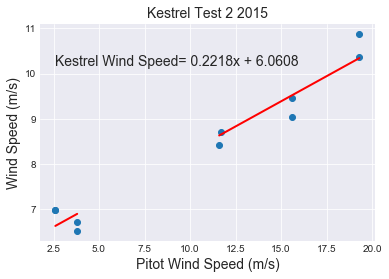

In [31]:
x=pit15_2['ws']
y=kes15_avg_2['ws']

mask = ~np.isnan(x) & ~np.isnan(y)
stats = linregress(x[mask],y[mask])
m = stats.slope
b = stats.intercept 

# Change the default marker for the scatter from circles to x's
# plt.scatter(x, y, marker='o',color='#003F72')
plt.scatter(x, y, marker='o')
# Set the linewidth on the regression line to 3px
y2= [i*m+b for i in x]
cor = np.corrcoef(x, y)
 
plt.plot(x, y2, color="red", linewidth=2)
plt.xlabel('Pitot Wind Speed (m/s)',fontsize='14')
plt.ylabel('Wind Speed (m/s)',fontsize='14')
plt.title('Kestrel Test 2 2015',fontsize='14')        
s= 'Kestrel Wind Speed= ' + str(round(m,4))+'x + '+str(round(b,4))
plt.grid(True)
plt.text(min(x),max(y)-0.7,s,fontsize='14')

c1 = 1/b
c0= (-1*m)/b

cal_eqn ='Calibration Equation: Pitot Wind Speed = ' + str(round(c0,4))+ ' + '+str(round(c1,4))+' * Kestrel Wind Speed (Test 2)'
print(cal_eqn)
bias = y2 - y
print('Bias = ' + str(bias))

Text(0.5,1,'Recomputed Pitot Wind Speeds')

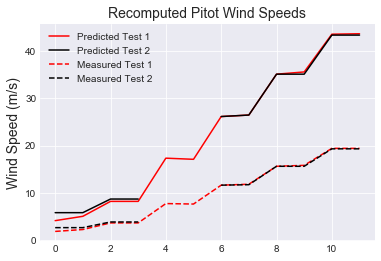

In [32]:
def pitot_speed(density,pressure):
    return np.sqrt(2*pressure/density)

predicted_speeds_1=[]
for label,x in pit15_1.iterrows():
    predicted_speeds_1.append(pitot_speed(x.air_dens,x.press))
    
predicted_speeds_1

predicted_speeds_2=[]
for label,x in pit15_2.iterrows():
    predicted_speeds_2.append(pitot_speed(x.air_dens,x.press))
    
plt.plot(predicted_speeds_1,c='r')
plt.plot(predicted_speeds_2,c='k')
plt.plot(pit15_1['ws'],'r--')
plt.plot(pit15_2['ws'],'k--')
plt.legend(['Predicted Test 1','Predicted Test 2','Measured Test 1','Measured Test 2'])
plt.ylabel('Wind Speed (m/s)',fontsize='14')
plt.title('Recomputed Pitot Wind Speeds',fontsize='14')  


#### Sonic 1 min average average

In [33]:
# son15_1.index = pd.DatetimeIndex(son15_1.time)
# avg_time = '60S'
# u = (son15_1['u'].resample(avg_time).mean())
# v = (son15_1['v'].resample(avg_time).mean())
# w = (son15_1['w'].resample(avg_time).mean())
# mean_wind = (son15_1['mean_wind'].resample(avg_time).mean())
# gu = (son15_1['gu'].resample(avg_time).mean())
# gv = (son15_1['gv'].resample(avg_time).mean())
# gw = (son15_1['gw'].resample(avg_time).mean())
# sound_speed = (son15_1['sound_speed'].resample(avg_time).mean())
# temp = (son15_1['temp'].resample(avg_time).mean())
# data = {'u':u,
#         'v':v,
#         'w':w,
#         'mean_wind':mean_wind,
#         'gu':gu, 
#         'gv':gv,
#         'gw':gw,
#         'sound_speed':sound_speed,
#         'temp':temp} 
# son15_1_avg=pd.DataFrame(data)
# son15_1_avg.head()

In [34]:
# son15_2.index = pd.DatetimeIndex(son15_2.time)
# avg_time = '60S'
# u = (son15_2['u'].resample(avg_time).mean())
# v = (son15_2['v'].resample(avg_time).mean())
# w = (son15_2['w'].resample(avg_time).mean())
# mean_wind = (son15_2['mean_wind'].resample(avg_time).mean())
# gu = (son15_2['gu'].resample(avg_time).mean())
# gv = (son15_2['gv'].resample(avg_time).mean())
# gw = (son15_2['gw'].resample(avg_time).mean())
# sound_speed = (son15_2['sound_speed'].resample(avg_time).mean())
# temp = (son15_2['temp'].resample(avg_time).mean())
# data = {'u':u,
#         'v':v,
#         'w':w,
#         'mean_wind':mean_wind,
#         'gu':gu, 
#         'gv':gv,
#         'gw':gw,
#         'sound_speed':sound_speed,
#         'temp':temp} 
# son15_2_avg=pd.DataFrame(data)
# son15_2_avg.head()

#### Import 2020 Kestrel data 

In [35]:
kes20 = pd.read_csv('kestrel_2020.csv',names=['time','ws'],header=0)
kes20['time'] = pd.to_datetime(kes20['time'])
start_date = pd.Timestamp(2020,3,6,11,50,0)
end_date = pd.Timestamp(2020,3,6,12,15,37)
mask1 = (kes20['time'] > start_date) & (kes20['time'] <= end_date)
kes20 = kes20.loc[mask1]

#### Import 2020 Sonic data 

In [36]:
son20 = pd.read_csv('sonic_2020.csv', header=None)
son20.columns = ['gu','gv','gw','sound_speed','temp']
N=len(son20)
freq= 10   #Hz
dt= str(1/freq)+'S'   #seconds 


start_time=pd.Timestamp(2020,3,6,11,50,0)
time = pd.date_range(start = start_time,periods=N,freq=dt)
son20.insert(0,'time',time,True)
met_dirs20 = convert_gill_to_met(son20['gu'],son20['gv'],son20['gw'])
u20=met_dirs20[0]
v20=met_dirs20[1]
w20=met_dirs20[2]
M20 = mean_horizontal_wind(u20,v20)

son20.insert(1,'u',u20,True)
son20.insert(2,'v',v20,True)
son20.insert(3,'w',w20,True)
son20.insert(4,'mean_wind',M20,True)

son20.sort_values('mean_wind',ascending=False).head()
son20 = son20.drop(13879)
son20 = son20.drop(15580)
son20 = son20.drop(3415)
son20 = son20.drop(14271)
son20 = son20.drop(9264)
son20 = son20.drop(12100)

start_date = pd.Timestamp(2020,3,6,11,50,0)
end_date = pd.Timestamp(2020,3,6,12,15,37)
mask2=(son20['time'] > start_date) & (son20['time'] <= end_date)
son20 = son20.loc[mask2]

#### Plot wind trace for test 2 2020

Text(0.5,1,'Wind Speed Traces Test 2 2020')

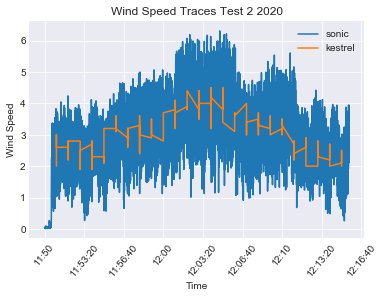

In [37]:



# speed_times=[pd.Timestamp(2020,3,6,11,50,0),pd.Timestamp(2020,3,6,11,55,30),
#              pd.Timestamp(2020,3,6,12,0,30),pd.Timestamp(2020,3,6,12,5,34),
#              pd.Timestamp(2020,3,6,12,10,35),pd.Timestamp(2020,3,6,12,15,37)]

# mask_times = son20.time.isin(speed_times)
# son20_times = son20.loc[mask_times]
# all_indices = son20_times.index

# plt.axvline(pd.Timestamp('2013-09-21'),color='r')
plt.plot(son20['time'].dt.time,son20['mean_wind'])
plt.plot(kes20['time'].dt.time,kes20['ws'])
plt.legend(['sonic','kestrel'])
plt.xticks(rotation=50)
plt.grid(True)
plt.ylabel('Wind Speed')
plt.xlabel('Time')
plt.title('Wind Speed Traces Test 2 2020')

In [38]:
def find_alpha(u,v):
    u = u.mean()
    v= v.mean()
    if u > 0.0:
        alpha = 90 - np.arctan(v/u)+180
    else:
        alpha = 90 - np.arctan(v/u)

    return alpha

find_alpha(son20['u'],son20['v'])

89.80134722903415

#### Average Kestrel and Sonic data

Text(0,0.5,'Wind Speed (m/s)')

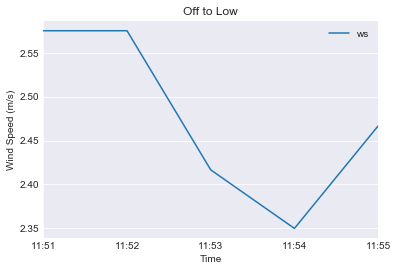

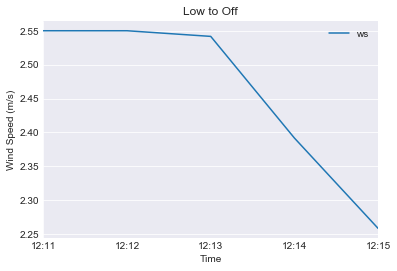

In [39]:
## OFF TO LOW
start_date= pd.Timestamp(2020,3,6,11,50,0)
end_date = pd.Timestamp(2020,3,6,11,55,30)
mask1 = (kes20['time'] >= start_date) & (kes20['time'] <= end_date)
kes20_begin = kes20.loc[mask1]
kes20_begin

kes20_begin.index = pd.DatetimeIndex(kes20_begin.time)
avg_time = '60S'
ws = (kes20_begin['ws'].resample(avg_time).mean())
data = {'ws':ws} 
kes20_begin_avg=pd.DataFrame(data)

kes20_begin_avg.plot()
plt.grid(True)
plt.title('Off to Low')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')



## LOW TO OFF
start_date= pd.Timestamp(2020,3,6,12,10,35)
end_date = pd.Timestamp(2020,3,6,12,15,37)
mask2 = (kes20['time'] >= start_date) & (kes20['time'] <= end_date)
kes20_end = kes20.loc[mask2]
kes20_end

kes20_end.index = pd.DatetimeIndex(kes20_end.time)
avg_time = '60S'
ws = (kes20_end['ws'].resample(avg_time).mean())
data = {'ws':ws} 
kes20_end_avg=pd.DataFrame(data)

kes20_end_avg.plot()
plt.grid(True)
plt.title('Low to Off')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')

Text(0,0.5,'Wind Speed (m/s)')

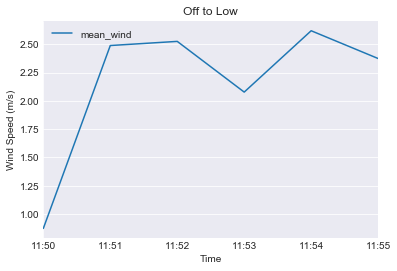

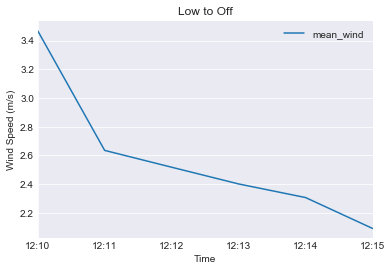

In [52]:
## OFF TO LOW
start_date= pd.Timestamp(2020,3,6,11,50,0)
end_date = pd.Timestamp(2020,3,6,11,55,30)
mask1 = (son20['time'] >= start_date) & (son20['time'] <= end_date)
son20_begin = son20.loc[mask1]
son20_begin

son20_begin.index = pd.DatetimeIndex(son20_begin.time)
avg_time = '60S'
ws = (son20_begin['mean_wind'].resample(avg_time).mean())
data = {'mean_wind':ws} 
son20_begin_avg=pd.DataFrame(data)

son20_begin_avg.plot()
plt.grid(True)
plt.title('Off to Low')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')



## LOW TO OFF
start_date= pd.Timestamp(2020,3,6,12,10,35)
end_date = pd.Timestamp(2020,3,6,12,15,37)
mask2 = (son20['time'] >= start_date) & (son20['time'] <= end_date)
son20_end = son20.loc[mask2]
son20_end

son20_end.index = pd.DatetimeIndex(son20_end.time)
avg_time = '60S'
ws = (son20_end['mean_wind'].resample(avg_time).mean())
data = {'mean_wind':ws} 
son20_end_avg=pd.DataFrame(data)

son20_end_avg.plot()
plt.grid(True)
plt.title('Low to Off')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')

In [112]:
area_org = trapz(son20_begin_avg['mean_wind'], dx=10000)
fol = area_org*0.63
for x in np.arange(len(son20_begin_avg)):
    area = trapz(son20_begin_avg['mean_wind'][0:x], dx=10000)
    print("area =", area, "x = ", x, "diff = ", abs(fol - area))
    
trapz(son20_begin_avg['mean_wind'][0:4], dx=10000)/trapz(son20_begin_avg['mean_wind'], dx=10000)

area = 0.0 x =  0 diff =  71418.54240290908
area = 0.0 x =  1 diff =  71418.54240290908
area = 16810.01632586247 x =  2 diff =  54608.52607704661
area = 41885.34122871618 x =  3 diff =  29533.2011741929
area = 64902.99336531453 x =  4 diff =  6515.549037594552
area = 88391.02566532789 x =  5 diff =  16972.483262418813


0.5725247876030949

In [111]:


area_org = trapz(son20_end_avg['mean_wind'], dx=10000)
fol = area_org*0.63
for x in np.arange(len(son20_end_avg)):
    area = trapz(son20_end_avg['mean_wind'][0:x], dx=10000)
    print("area =", area, "x = ", x, "diff = ", abs(fol - area))
    
trapz(son20_end_avg['mean_wind'][0:4], dx=10000)/trapz(son20_end_avg['mean_wind'], dx=10000)

area = 0.0 x =  0 diff =  79634.81112203776
area = 0.0 x =  1 diff =  79634.81112203776
area = 30514.161834213675 x =  2 diff =  49120.64928782408
area = 56277.45607253307 x =  3 diff =  23357.355049504695
area = 80873.07360519568 x =  4 diff =  1238.262483157916
area = 104412.99657914272 x =  5 diff =  24778.185457104963


0.6397960345908776

In [119]:
area_org = trapz(kes20_begin_avg['ws'], dx=10000)
fol = area_org*0.63
for x in np.arange(len(kes20_begin_avg)):
    area = trapz(kes20_begin_avg['ws'][0:x], dx=10000)
    print("area =", area, "x = ", x, "diff = ", abs(fol - area))
    
print(trapz(kes20_begin_avg['ws'][0:4], dx=10000)/trapz(kes20_begin_avg['ws'], dx=10000))

area = 0.0 x =  0 diff =  62133.75
area = 0.0 x =  1 diff =  62133.75
area = 25750.0 x =  2 diff =  36383.75
area = 50708.333333333336 x =  3 diff =  11425.416666666664
area = 74541.66666666667 x =  4 diff =  12407.916666666672


0.7558090409801437

In [117]:
area_org = trapz(kes20_end_avg['ws'], dx=10000)
fol = area_org*0.63
for x in np.arange(len(kes20_end_avg)):
    area = trapz(kes20_end_avg['ws'][0:x], dx=10000)
    print("area =", area, "x = ", x, "diff = ", abs(fol - area))
    
print(trapz(kes20_end_avg['ws'][0:4], dx=10000)/trapz(kes20_end_avg['ws'], dx=10000))

area = 0.0 x =  0 diff =  62291.25
area = 0.0 x =  1 diff =  62291.25
area = 25500.000000000004 x =  2 diff =  36791.25
area = 50958.333333333336 x =  3 diff =  11332.916666666664
area = 75625.0 x =  4 diff =  13333.75


0.7648546144121365